In [1]:
from networkx.generators.random_graphs import erdos_renyi_graph
import matplotlib.pyplot as plt
import networkx as nx 
import random 

In [5]:
class SocialNetworkGraph(object):
    
    infected_nodes=[]
    connection_probability = 0
    number_of_nodes = 0
    Erdos_graph = erdos_renyi_graph
    Erdos_graph_dict = dict
    
    def __init__(self, nodes, probability):
        self.number_of_nodes = nodes 
        self.connection_probability = probability
        
    
    def ERGraph(self):
        """Creating a graph structure."""
        self.Erdos_graph = erdos_renyi_graph(self.number_of_nodes, self.connection_probability)
        nx.draw(self.Erdos_graph, with_labels=True)
        plt.show(self.Erdos_graph)
        self.Erdos_graph_dict = nx.to_dict_of_lists(self.Erdos_graph)
        return 

    
    def InfectedNodes(self, infection_rate):
        """Creating the initially infected nodes."""
        number_of_infected_nodes = infection_rate * self.number_of_nodes

        while len(self.infected_nodes) < number_of_infected_nodes:
            n = random.randint(0, self.number_of_nodes)
            self.infected_nodes.append(n)
            self.infected_nodes = list(dict.fromkeys(self.infected_nodes))    
        return
    
    
    def NodeThreshold (self, node, threshold):
        """Evaluating the node's threshold against the proportion of infected neighbours."""
        if node > self.number_of_nodes:
            print ("Node " + str(node) + " is not found in nodes.")    
        elif node in self.infected_nodes:
            return ""
        else:
            # print("Node's " + str(node) +" neighbours on graph: " + str(self.Erdos_graph_dict[node]) + " and threshold is " + str(threshold))
            lambda_node = len(list(set(self.infected_nodes).intersection(self.Erdos_graph_dict[node])))/len(self.Erdos_graph_dict[node])
                
            if lambda_node >= threshold:
                 self.infected_nodes.append(node)
                 # print("Node " + str(node) + " has become infected.")
            else:
                 return ""


# Execution

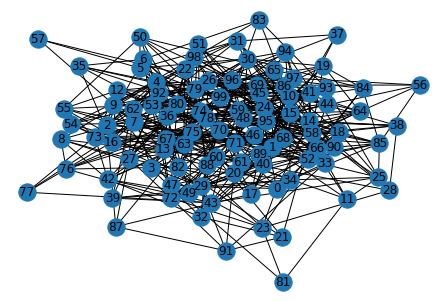

(Before execution) Infected nodes: 1
(After execution) Infected nodes: 100 and suscetible nodes: 0


In [8]:
G=SocialNetworkGraph(100, 0.1)
G.ERGraph()
G.InfectedNodes(0.01)
print ("(Before execution) Infected nodes: " + str(len(G.infected_nodes)))


time = []
infected_nodes_at_time_step = []
susceptible_nodes_at_time_step = []
for iteration in range (10):
    # print("Iteration: " + str(iteration))
    infected_nodes_at_time_step.append(len(G.infected_nodes))
    susceptible_nodes_at_time_step.append(G.number_of_nodes-len(G.infected_nodes))
    
    for x in range (G.number_of_nodes): 
        G.NodeThreshold(x, random.randint(0, 100)/100)
        
    time.append(iteration)

print("(After execution) Infected nodes: " + str(len(G.infected_nodes)) + " and suscetible nodes: " + str(G.number_of_nodes-len(G.infected_nodes)))

## Plotting

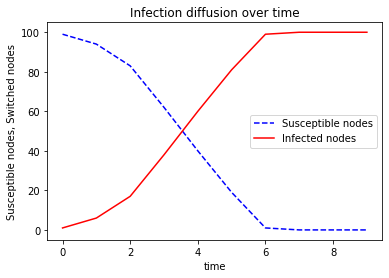

In [9]:
plt.plot(time, susceptible_nodes_at_time_step, '--', color="blue", label="Susceptible nodes")
plt.plot(time, infected_nodes_at_time_step, '-', color="red", label="Infected nodes")
plt.title("Infection diffusion over time")
plt.xlabel("time")
plt.ylabel("Susceptible nodes, Switched nodes")
plt.legend()
plt.show()